In [4]:
#####Generater and Discrminater network
###requied libiries
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import time

mnist=input_data.read_data_sets("./MNIST_data",one_hot=True)

####parameters definition
dim=100
batch_size=256
h1_dim=150
h2_dim=300
learning_rate=0.0001
def generater_net(z_noise):
    ###layer 1####
    w1=tf.Variable(tf.truncated_normal([dim,h1_dim],stddev=0.1),dtype=tf.float32)
    b1=tf.Variable(tf.zeros(h1_dim),dtype=tf.float32)
    h1=tf.nn.relu(tf.matmul(z_noise,w1)+b1)
    
    ###layer 2####
    w2=tf.Variable(tf.truncated_normal([h1_dim,h2_dim],stddev=0.1),dtype=tf.float32)
    b2=tf.Variable(tf.zeros(h2_dim),dtype=tf.float32)
    h2=tf.nn.relu(tf.matmul(h1,w2)+b2)
    
     ###output####
    w3=tf.Variable(tf.truncated_normal([h2_dim,28*28],stddev=0.1),dtype=tf.float32)
    b3=tf.Variable(tf.zeros(28*28),dtype=tf.float32)
    h3=tf.matmul(h2,w3)+b3
    out_g=tf.nn.tanh(h3)
    weights_g=[w1,b1,w2,b2,w3,b3]
    
    return out_g,weights_g

def discriminater(x,out_g,keep_prob):
    x_all=tf.concat([x,out_g],0)
    ####layer 1####
    w1=tf.Variable(tf.truncated_normal([28*28,h2_dim],stddev=0.1),dtype=tf.float32)
    b1=tf.Variable(tf.zeros(h2_dim),dtype=tf.float32)
    h1=tf.nn.dropout(tf.nn.relu(tf.matmul(x_all,w1)+b1),keep_prob)
    
    ####layer 2####
    w2=tf.Variable(tf.truncated_normal([h2_dim,h1_dim],stddev=0.1),dtype=tf.float32)
    b2=tf.Variable(tf.zeros(h1_dim),dtype=tf.float32)
    h2=tf.nn.dropout(tf.nn.relu(tf.matmul(h1,w2)+b2),keep_prob)
    
    ####output layer####
    w3=tf.Variable(tf.truncated_normal([h1_dim,1],stddev=0.1),dtype=tf.float32)
    b3=tf.Variable(tf.zeros(1),dtype=tf.float32)
    h3=tf.matmul(h2,w3)+b3
    
    y_data=tf.nn.sigmoid(tf.slice(h3,[0,0],[batch_size,-1]))
    y_fake=tf.nn.sigmoid(tf.slice(h3,[batch_size,0],[-1,-1]))
    weights_d=[w1,b1,w2,b2,w3,b3]
    
    return y_data,y_fake,weights_d

##########tf ops,loss,optimizer###
x=tf.placeholder(tf.float32,[batch_size,28*28])
z_noise=tf.placeholder(tf.float32,[batch_size,dim])
keep_prob=tf.placeholder(tf.float32)

out_g,weights_g=generater_net(z_noise)
y_data,y_fake,weights_d=discriminater(x,out_g,keep_prob)

d_loss=-tf.log(y_data)-tf.log(1-y_fake)
g_loss=-tf.log(y_fake)

optimizer=tf.train.AdamOptimizer(learning_rate)

train_g=optimizer.minimize(g_loss,var_list=weights_g)
train_d=optimizer.minimize(d_loss,var_list=weights_d)

z_sample=np.random.uniform(-1,1,size=(batch_size,dim)).astype(np.float32)
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
#saver = tf.train.Saver()
start_time=time.time()
for i in range(60000):
    x_,y_=mnist.train.next_batch(batch_size)
    x_value=2*x_.astype(np.float32)-1
    z_sample=np.random.uniform(-1,1,size=(batch_size,dim)).astype(np.float32)
    sess.run([train_g,train_d],feed_dict={x:x_value,z_noise:z_sample,keep_prob:0.7})
    c1,c2=sess.run([g_loss,d_loss],feed_dict={x:x_value,z_noise:z_sample,keep_prob:0.7})
    #print("epochs:",i,"generater loss:",c1,"discriminator loss:",c2)
    end_time=time.time()
print("running time:",(end_time-start_time))
 
'''gen_imgs=sess.run(out_g,feed_dict={z_noise:z_sample})
#saver.save(sess, " newgan33",global_step=i)
imgs=0.5*(gen_imgs+1)
for k in range(36):
    plt.subplot(6,6,k+1)
    img=np.reshape(imgs[k],(28,28))
    plt.imshow(img,cmap='gray')'''


Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz
running time: 4348.204449892044


'gen_imgs=sess.run(out_g,feed_dict={z_noise:z_sample})\n#saver.save(sess, " newgan33",global_step=i)\nimgs=0.5*(gen_imgs+1)\nfor k in range(36):\n    plt.subplot(6,6,k+1)\n    img=np.reshape(imgs[k],(28,28))\n    plt.imshow(img,cmap=\'gray\')'

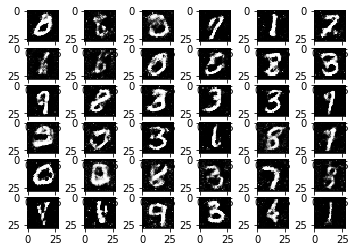

In [5]:
gen_imgs=sess.run(out_g,feed_dict={z_noise:z_sample})
#saver.save(sess, " newgan33",global_step=i)
imgs=0.5*(gen_imgs+1)
for k in range(36):
    plt.subplot(6,6,k+1)
    img=np.reshape(imgs[k],(28,28))
    plt.imshow(img,cmap='gray')

In [6]:
4348/60

72.46666666666667